In [ ]:
'''

Assignment 5: Credit Card Fraud Detection
Dataset: Credit Card Fraud
Link: https://raw.githubusercontent.com/anshulc55/datasets/main/creditcard.csv
Task:
 Predict fraudulent transactions.
 Handle missing values.
 StandardScaler strongly recommended.
 Use KNN for classification (try K=5,7,11).
 Handle class imbalance using undersampling.

'''

In [ ]:
'''

id: Unique identifier for each transaction
V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
Amount: The transaction amount
Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

'''

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_csv('creditcard_2023.csv')  ## load the dataset

In [5]:
df  ## show the dataset

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [6]:
df.isnull().sum()  ## check null value

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df1 = df.drop(['id'],axis=1)  ## drop the unnecessary column

In [8]:
df1.head()  ## new dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [9]:
df1.corr()  ## correlation of the dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,0.599108,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,-0.621798,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,0.707676,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,-0.712839,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,0.563874,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,0.471000,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,0.678004,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,-0.199995,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,0.748487,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522
V10,0.599108,-0.621798,0.707676,-0.712839,0.563874,0.471000,0.678004,-0.199995,0.748487,1.000000,...,0.037426,-0.150957,-0.056285,0.045935,-0.014045,-0.053684,-0.134907,0.035646,-0.001259,-0.673665


In [31]:
x = df1.drop(['Class'],axis=1)

In [33]:
y = df1['Class']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)  ## split 80% for training and 20% for testing

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()  ## create object of standard scaler

In [38]:
## fit and transform of standard scaling
x_train[['Amount']] = scaler.fit_transform(x_train[['Amount']])
x_test[['Amount']] = scaler.transform(x_test[['Amount']])

In [39]:
x_train.head()  ## after scaling show the dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
185742,1.862316,-0.651330,0.104213,-0.919691,-0.000360,-0.059627,0.178946,-0.189526,0.413883,0.616745,...,-0.039824,0.003840,0.817626,0.151143,2.408233,-0.314798,-0.340417,-0.201747,-0.095230,0.279549
230800,0.236756,-0.179394,0.473358,-1.025516,0.600766,0.103597,0.846140,-0.186421,0.474406,0.430048,...,-0.153833,-0.222860,-0.623179,-0.018551,-1.196991,-0.718699,0.426185,0.059593,0.119392,-1.076686
52512,0.956684,-0.419968,0.842188,-0.266711,0.084403,0.234821,0.418787,-0.165165,0.710601,0.493787,...,-0.277112,-0.173165,-0.277953,0.048442,0.983670,0.509278,0.615448,-0.240224,-0.063627,-1.085515
527225,-2.430374,2.950975,-2.339122,1.252035,-2.960979,-2.687294,-2.269941,4.938809,-1.111869,-1.235952,...,1.442289,0.564086,-1.632268,-1.190606,0.350840,3.097134,-0.509785,1.735048,0.882970,1.144079
378924,-0.744439,-0.281348,-0.179572,0.736196,-0.547528,0.835746,-0.101804,0.035615,-0.729117,-0.463129,...,-0.288512,0.162637,1.038464,1.063990,-0.339228,-0.060377,0.313557,1.020515,-1.285171,0.095573


In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
## sorted accuracy score and n_neighbors together
l = [5,7,11]
pl = []
acc = []
for i in range(3):
    knn = KNeighborsClassifier(n_neighbors=l[i])
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    acc.append(accuracy_score(y_pred,y_test))
    pl.append((accuracy_score(y_pred,y_test),l[i]))
    
sort = sorted(pl, key = lambda x: x[0] , reverse=True)
print(sort)
b = sort[0][1]
print('Maxium accuracy has occured on : ',b,'point')

[(0.9979951814009109, 5), (0.9975643212633875, 7), (0.9966762217962472, 11)]
Maxium accuracy has occured on :  5 point


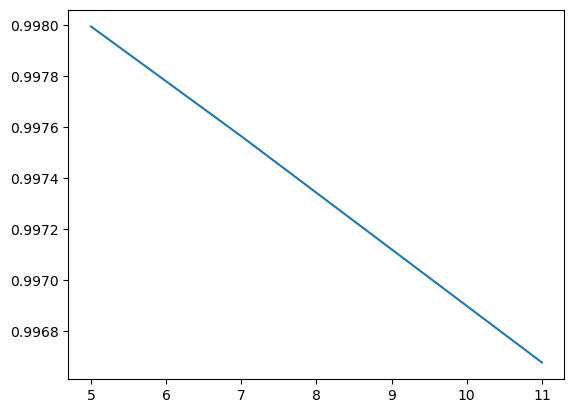

In [43]:
plt.plot(l,acc)  ## show plot accuracy score basis on n_neighbors

In [44]:
knn1 = KNeighborsClassifier(n_neighbors=b)  ## create object of the above highest accuracy point

In [45]:
knn1.fit(x_train , y_train)  ## fit the model

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [46]:
y_pred1 = knn1.predict(x_test)  ## predict the x_test the dataset 

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
accuracy_score(y_test,y_pred)  ## check accuracy score of the model

0.9966762217962472

[[56676   378]
 [    0 56672]]


Text(50.72222222222221, 0.5, 'Actual Values')

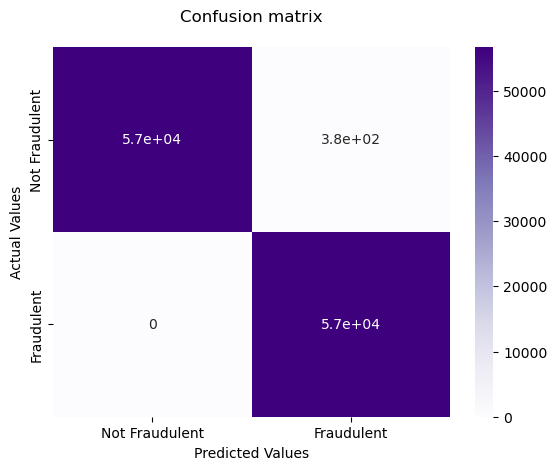

In [49]:
## show confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm, annot=True,cmap='Purples',xticklabels=['Not Fraudulent','Fraudulent'],yticklabels=['Not Fraudulent','Fraudulent'])
plt.title('Confusion matrix\n')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [50]:
print(classification_report(y_test,y_pred))  ## show classification report of this model

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     57054
           1       0.99      1.00      1.00     56672

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
'''
Model Interpretation :
            1. Overall Accuracy (~99–100%):
                            The model achieves almost perfect accuracy, meaning it correctly classifies nearly all transactions.
                            At first glance, this indicates excellent performance.
                            However, in fraud detection, accuracy alone is not sufficient and must be interpreted cautiously.
            2. Precision Analysis:
                            High precision for fraud class means:
                            Very low false alarms.
                            Operational teams will not be overloaded with incorrect fraud alerts.
            3. Recall Analysis (Most Critical Metric in Fraud Detection):
                            Recall for fraud = 1.00
                            This means:
                                    No fraudulent transaction is missed.
                                    This is the most important success factor in fraud detection systems.
            4. F1-Score Evaluation:
                            F1-score of 1.00 for both classes indicates:
                            Perfect balance between precision and recall.
                            Extremely stable classification behavior.
            5. Impact of Standard Scaling:
                            KNN is a distance-based algorithm.
                            Standard scaling ensured:
                            All features contributed equally.
                            No feature dominated due to larger numeric values.
            6. Effectiveness of KNN:
                            KNN worked well because:
                                    Data appears well-separated.
                                    Proper scaling improved neighborhood similarity.
                                    Local patterns effectively captured fraudulent behavior.



Conclusion :
        1. The KNN model achieves near-perfect accuracy, indicating strong classification performance.
        2. Precision and recall for both classes are extremely high.
        3. Standard scaling significantly improved KNN’s effectiveness.
        4. A small number of legitimate transactions are incorrectly flagged, which is acceptable in fraud detection.
        5. The model is highly reliable for fraud identification under the given dataset conditions.
        6. Further validation is required to ensure no data leakage or overfitting.

'''